In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

#Import data
df = pd.read_csv("/Users/aidanastridge/Documents/NHPI_G3.csv")

In [2]:
#Exploratory data analysis function
def eda(x):
    print(x.name)
    print("Mean:", np.mean(x))
    print("Standard Deviation:", np.std(x))
    print("Variance:",np.var(x))
    print("Minimum:",np.min(x))
    print("Q25:", np.quantile(x,.25))
    print("Median:",np.quantile(x,.5))
    print("Q75:",np.quantile(x,.75))
    print("Maximum:",np.max(x))
    print("")

In [3]:
#Eda on NHPI by region
for x in list(df['GEO'].unique()):
    print(x)
    eda(df.loc[df['GEO'] == x, 'NHPI']) 

Atlantic Region
NHPI
Mean: 92.40558510638297
Standard Deviation: 10.065022416934559
Variance: 101.30467625339519
Minimum: 66.6
Q25: 86.875
Median: 96.95
Q75: 99.8
Maximum: 103.1

Prairie Region
NHPI
Mean: 92.9244680851064
Standard Deviation: 11.792444264796977
Variance: 139.06174173834313
Minimum: 50.0
Q25: 92.4
Median: 96.6
Q75: 99.92500000000001
Maximum: 102.9



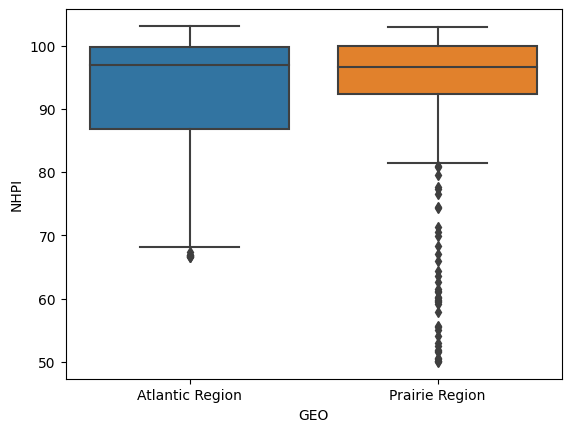

In [4]:
#Boxplot on NHPI by region
ax = sns.boxplot(x='GEO',y='NHPI',data=df)

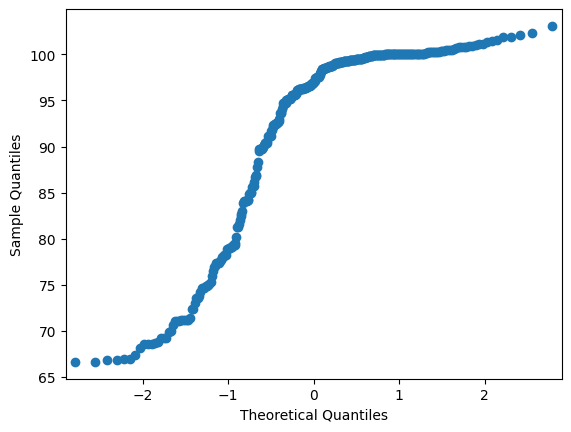

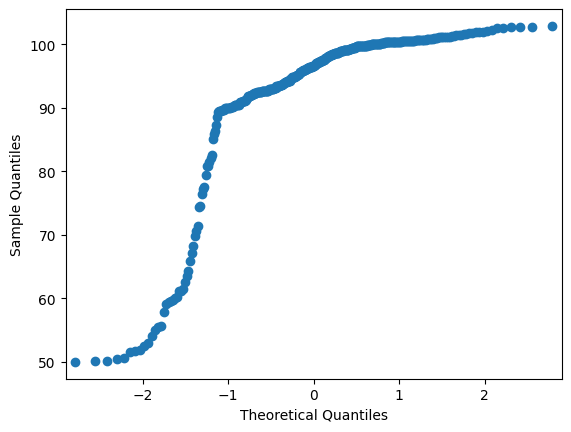

In [5]:
#QQplot on NHPI by region
for x in list(df['GEO'].unique()):
    sm.qqplot(df.loc[df['GEO'] == x, 'NHPI']) 

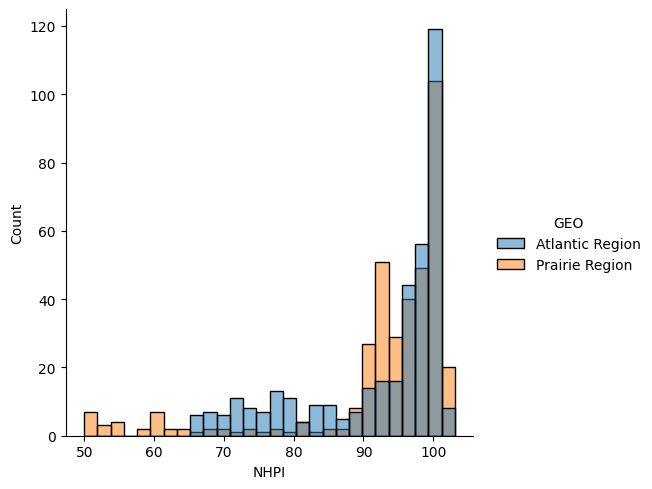

In [6]:
#Histogram on NHPI by region
sns.displot(df,x="NHPI", hue="GEO")

In [7]:
# Two sample independent t-test
x = df.loc[df['GEO'] == 'Atlantic Region', 'NHPI']
y = df.loc[df['GEO'] == 'Prairie Region', 'NHPI']
stats.ttest_ind(a=x, b=y, equal_var=False)

Ttest_indResult(statistic=-0.6481091644763917, pvalue=0.5171175999544275)

NHPI by region is significantly similar.

In [8]:
stats.ttest_1samp(a=df.loc[df['GEO'] == 'Atlantic Region', 'NHPI'], popmean=93, alternative='greater')

TtestResult(statistic=-1.1436432470547626, pvalue=0.8732494289767226, df=375)

NHPI by Atlantic Region is not significantly greater than 93.

In [9]:
stats.ttest_1samp(a=df.loc[df['GEO'] == 'Prairie Region', 'NHPI'], popmean=93, alternative='greater')

TtestResult(statistic=-0.12403444185161669, pvalue=0.5493227695246806, df=375)

NHPI by Prairie Region is not significantly greater than 93.